In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress

rcParams['figure.figsize'] = (16, 10)
plt.switch_backend('qt4agg')
import seaborn

In [3]:
sigma = 10
rho = 28
beta = 8. / 3

def lorenz_ode(inputs, T):
    y = inputs[1]
    x = inputs[0]
    z = inputs[2]
    return np.array([sigma * (y - x), rho * x - y - x * z, x * y - beta * z])


def plot_lorenz(conds, show=True, atol=None, rtol=None, time=50):
    sigma = 10
    rho = 28
    beta = 8. / 3

    if show:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    def lorenz_ode(inputs, T):
        y = inputs[1]
        x = inputs[0]
        z = inputs[2]
        return np.array([sigma * (y - x), rho * x - y - x * z, x * y - beta * z])

    def solve_lorenz(init_cond, time=10):
        T = np.linspace(0, time, time * 100)  # initialize time interval for ode
        if atol is not None:
            out = odeint(lorenz_ode, init_cond, T, atol=atol, rtol=rtol).T
        else:
            out = odeint(lorenz_ode, init_cond, T).T
        X, Y, Z = out[:3]

        return X, Y, Z

    datalist = []
    for cond in conds:
        # init_cond = np.random.randn(3) * 15 # Three random conditions
        X, Y, Z = solve_lorenz(cond, time)

        datalist.append([X, Y, Z])
        if show:
            ax.plot(X, Y, Z, lw=1)
            
    if show:
        plt.show()

    return datalist

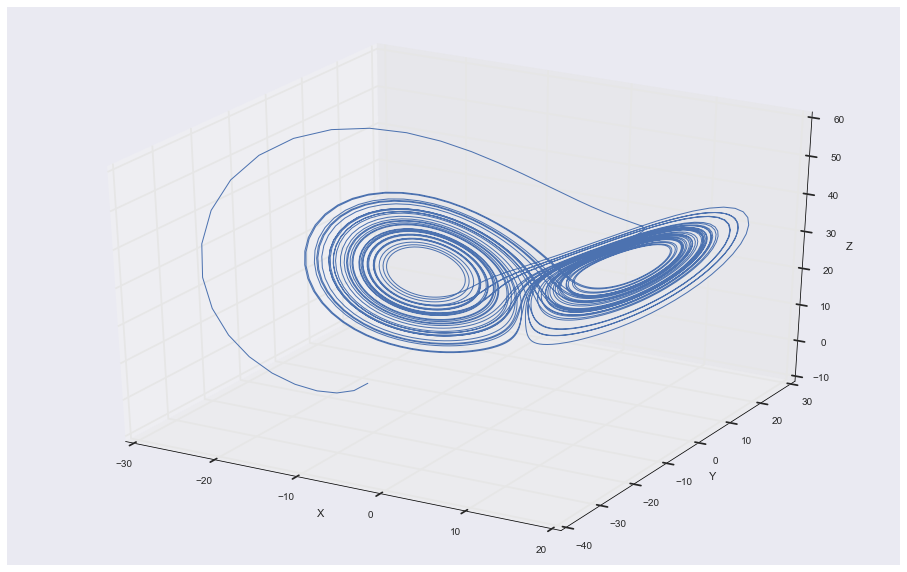

In [23]:
def p1():
    cond = np.random.randn(3) * 15
    plot_lorenz([cond], show=True)
    
p1()

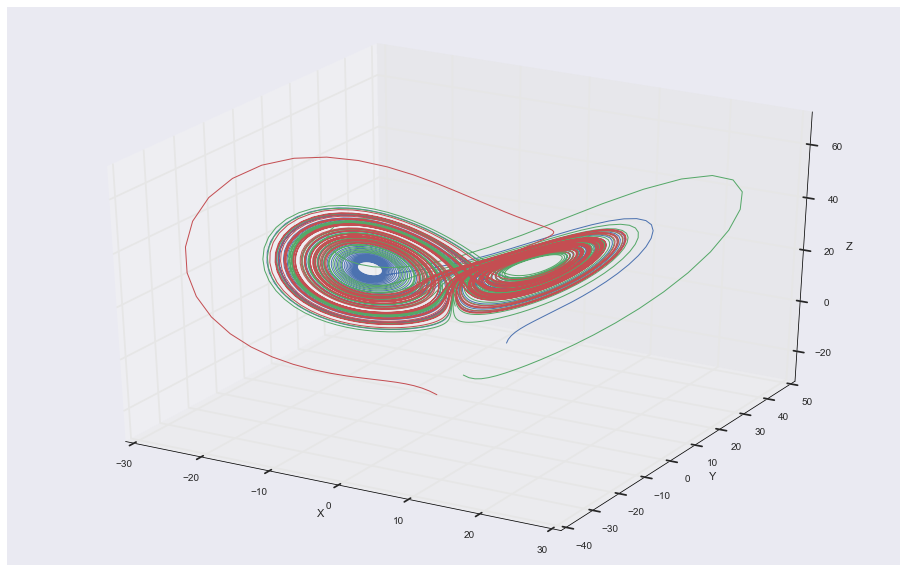

In [25]:
def p2():
    conds = []
    n = 3
    for i in range(n):
        cond = np.random.randn(3) * 15  # Three random conditions
        conds.append(cond)

    plot_lorenz(conds)
    
p2()

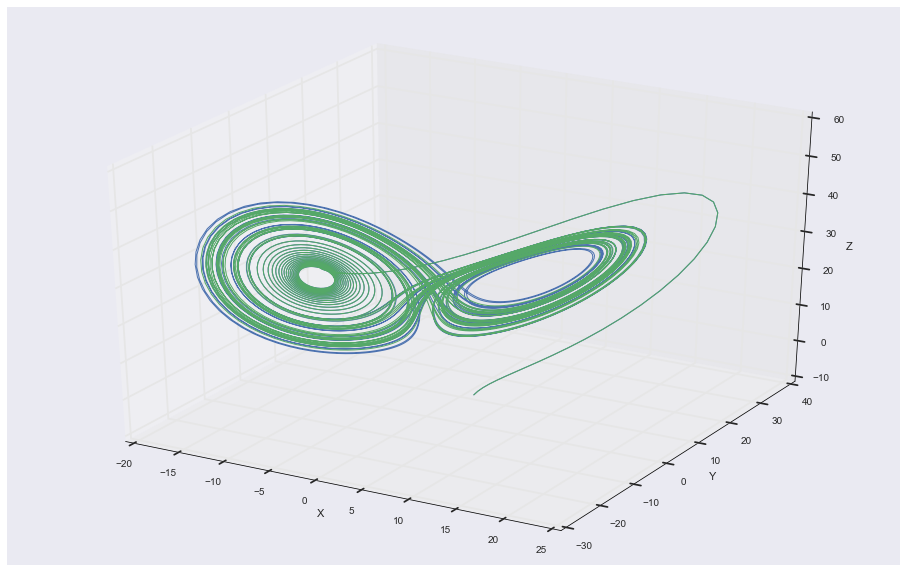

In [13]:
def p3():
    cond1 = np.random.randn(3) * 15
    cond2 = cond1 + np.random.randn(3) * (1e-10)
    plot_lorenz([cond1, cond2])
    
p3()

In [5]:
def p4():
    cond1 = np.random.randn(3) * 15
    cond2 = cond1 + np.random.randn(3) * (1e-10)
    data = plot_lorenz([cond1, cond2], show=False)
    list = data[0]
    X1, Y1, Z1 = list[0], list[1], list[2]

    X2, Y2, Z2 = data[1]

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim3d([min(X1), max(X1)])
    ax.set_ylim3d([min(Y1), max(Y1)])
    ax.set_zlim3d([min(Z1), max(Z1)])

    line1, = plt.plot([], [], [])
    line2, = plt.plot([], [], [])

    def update(index):
        line1.set_data(X1[:index], Y1[:index])
        line2.set_data(X2[:index], Y2[:index])
        line1.set_3d_properties(Z1[:index])
        line2.set_3d_properties(Z2[:index])

        return line1, line2

    a = FuncAnimation(fig, update, frames=len(X1), interval=1)
    plt.show()
    
p4()

In [4]:
def p5():
    cond = np.random.randn(3) * 15
    data = plot_lorenz([cond], show=False, atol=1e-14, rtol=1e-12)
    list = data[0]
    X1, Y1, Z1 = list[0], list[1], list[2]

    data = plot_lorenz([cond], show=False, atol=1e-15, rtol=1e-13)
    list = data[0]
    X2, Y2, Z2 = list[0], list[1], list[2]

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim3d([min(X1), max(X1)])
    ax.set_ylim3d([min(Y1), max(Y1)])
    ax.set_zlim3d([min(Z1), max(Z1)])


    line1, = plt.plot([], [], [])
    line2, = plt.plot([], [], [])

    def update(index):
        line1.set_data(X1[:index], Y1[:index])
        line2.set_data(X2[:index], Y2[:index])
        line1.set_3d_properties(Z1[:index])
        line2.set_3d_properties(Z2[:index])
        return line1, line2,

    a = FuncAnimation(fig, update, frames=len(X1), interval=1)
    plt.show()
    
p5()

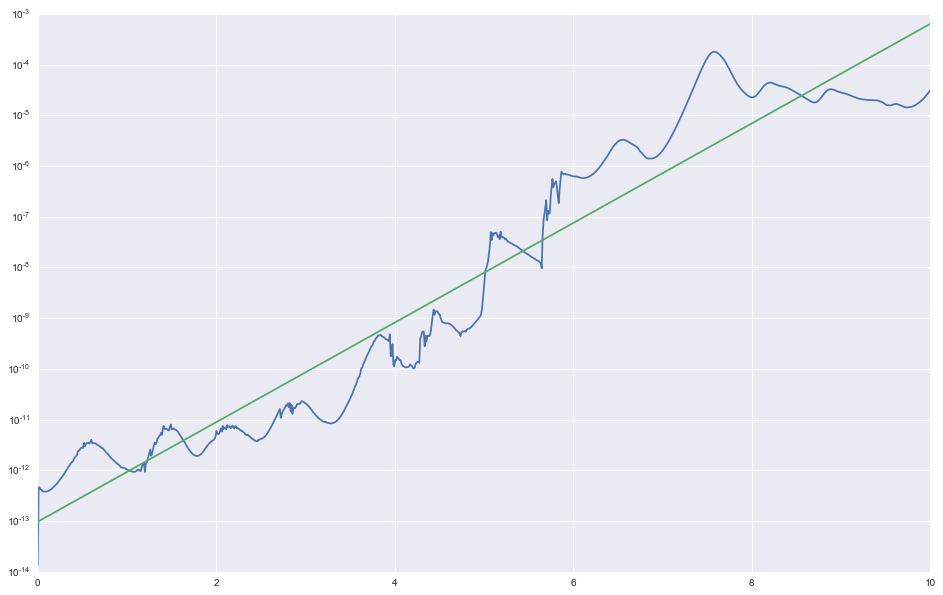

In [28]:
def p6(time=10):
    cond = np.random.randn(3) * 15
    data = plot_lorenz([cond], show=False)[0]

    initial = [data[0][-1], data[1][-1], data[2][-1]]
    # print initial
    initial2 = initial + np.random.rand(3) * (1e-14)
    # print initial2

    sol1, sol2 = plot_lorenz([initial, initial2], show=False, time=time)
    s1 = np.array([sol1[0], sol1[1], sol1[2]])
    s2 = np.array([sol2[0], sol2[1], sol2[2]])

    norms = np.linalg.norm(s1 - s2, axis=0)

    x = np.linspace(0, time, len(norms))
    lnorms = np.log(norms)

    s, i = linregress(x, lnorms)[:2]
    y = s * x + i

    expts = np.exp(y)


    plt.semilogy(x, norms)
    plt.semilogy(x, expts)
    plt.show()

p6()